# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- scipy: https://scipy.org/install/
- gym: https://github.com/openai/gym (**New package to install**)

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import random
import gym
from statistics import mean
from collections import defaultdict
import tqdm.notebook as tqdm

In [42]:
"""Plot function similar to Ex1"""
def plot_curves(arr_list, legend_list, color_list, ylabel):
    """
    Args:
        arr_list (list): list of results arrays to plot
        legend_list (list): list of legends corresponding to each result array
        color_list (list): list of color corresponding to each result array
        ylabel (string): label of the Y axis

        Note that, make sure the elements in the arr_list, legend_list and color_list are associated with each other correctly.
        Do not forget to change the ylabel for different plots.
    """
    # set the figure type
    plt.clf()
    fig, ax = plt.subplots(figsize=(12, 8))

    # PLEASE NOTE: Change the labels for different plots
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Steps")

    # ploth results
    h_list = []
    for arr, legend, color in zip(arr_list, legend_list, color_list):
        # compute the standard error
        arr_err = arr.std(axis=0) / np.sqrt(arr.shape[0])
        # plot the mean
        h, = ax.plot(range(arr.shape[1]), arr.mean(axis=0), color=color, label=legend)
        # plot the confidence band
        arr_err = 1.96 * arr_err
        ax.fill_between(range(arr.shape[1]), arr.mean(axis=0) - arr_err, arr.mean(axis=0) + arr_err, alpha=0.3,
                        color=color)
        # save the plot handle
        h_list.append(h)

    # plot legends
    ax.legend(handles=h_list)
    plt.show()

# Q2: Backjack 

Please note, since there is no scaffolding code for this question. Please make sure your implementation is well-tested and the comments are clear to understand. 

In [43]:
# test code for using the "Backjack" implementation from OpenAI
env = gym.make("Blackjack-v1")
env.reset()

# iteracting with the environment for 10 time steps using a random policy
for t in range(10): 
    # sample an random action
    action = env.action_space.sample()
    # action = 0 stick
    # action = 1 hit
    
    # interact with the envrionment
#     next_s, reward, done, info, _ = env.step(action)
    next_s, reward, done, info = env.step(action)
    
    # print info
    print(f"t = {t}, action = {action}, next_state = {next_s}, reward = {reward}, done = {done}")
#     print(next_s[2])
    
    # check termination
    if done:
        print("done")
        env.reset()

t = 0, action = 0, next_state = (17, 3, False), reward = 1.0, done = True
done
t = 1, action = 0, next_state = (16, 10, True), reward = 1.0, done = True
done
t = 2, action = 1, next_state = (19, 10, True), reward = 0.0, done = False
t = 3, action = 0, next_state = (19, 10, True), reward = 1.0, done = True
done
t = 4, action = 1, next_state = (17, 5, False), reward = 0.0, done = False
t = 5, action = 1, next_state = (22, 5, False), reward = -1.0, done = True
done
t = 6, action = 0, next_state = (11, 5, False), reward = -1.0, done = True
done
t = 7, action = 1, next_state = (18, 10, False), reward = 0.0, done = False
t = 8, action = 1, next_state = (25, 10, False), reward = -1.0, done = True
done
t = 9, action = 1, next_state = (13, 3, False), reward = 0.0, done = False


## (a): Implement first-visit Monte-Carlo policy evaluation (See pseudocode on page 92). 

Please read the Example 5.1 on page 93 and reproduce the Figure 1. The policy to be evaluated is the "sticks only on 20 or 21". Please only reproduce the plots after 500, 000 episodes (Usable ace and No usable ace). 

In [44]:
""" CODE HERE YOUR IMPLEMENTATION for Q2-(a) """

# define the policy function
def policSticksy2021(state):
    if state[0] < 20:
        return 1
    else:
        return 0
    
# define episodeGenerator
def episodeGenerator(env,policy):
    
    state = []
    action = []
    reward = []
    
    current_state = env.reset()
    
    while True:
        #S0
        state.append(current_state)
        #A0
        action_ = policSticksy2021(current_state)
        action.append(action_)       
        #next state
        current_state, reward_, done, info = env.step(action_)
        #R1 
        reward.append(reward_)       
        if done:
            break
    return state, action, reward
        

def first_visit_MC_policy_evaluation(policy, env, episode):
    value = defaultdict(float)
    counter = defaultdict(int)
    
    for i in range(episode):
        state, action, reward_ = episodeGenerator(env, policy)
        G = 0
        
        for t in range(len(state) - 1, -1, -1):
#             print("t = ", t)
            G = G + reward_[t]
            S = state[t]
            
            if state[t] not in state[:t]:
                counter[state[t]] = counter[state[t]] + 1
                value[(state[t])] = value[(state[t])] + (G - value[(state[t])]) / counter[S]
                
    return value
        

0


In [45]:
from matplotlib import pyplot
def plot_backjack(V, ax1, ax2):
    player = np.arange(12, 21 + 1)
    dealer = np.arange(1, 10 + 1)
    ace = np.array([False, True])
    state_values = np.zeros((len(player), len(dealer), len(ace)))

    for i, player_ in enumerate(player):
        for j, dealer_ in enumerate(dealer):
            for k, ace_ in enumerate(ace):
                state_values[i, j, k] = V[player_, dealer_, ace_]
    
    X, Y = np.meshgrid(dealer, player)
 
    ax1.plot_wireframe(X, Y, state_values[:, :, 0], color='black')
    ax2.plot_wireframe(X, Y, state_values[:, :, 1], color='black')
 
    for ax in ax1, ax2:
        ax.set_zlim(-1, 1)
        ax.set_ylabel('Player sum')
        ax.set_xlabel('Dealer showing')

In [491]:
Value500000 = first_visit_MC_policy_evaluation(policSticksy2021,env,500000)
Value10000 = first_visit_MC_policy_evaluation(policSticksy2021,env,10000)

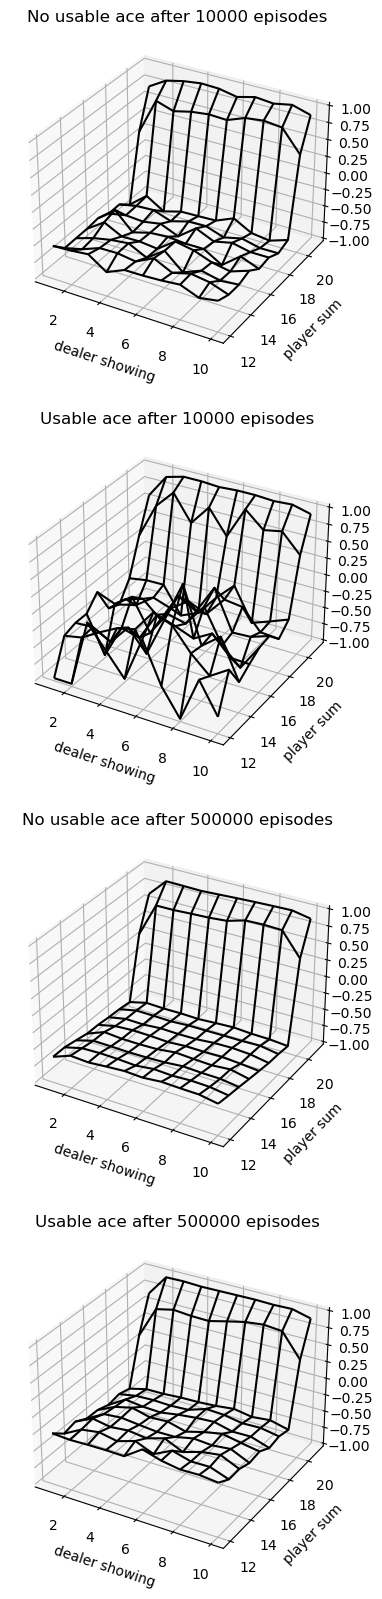

In [492]:
fig, axes = pyplot.subplots(nrows=4, figsize=(15, 20), subplot_kw={'projection': '3d'})
axes[0].set_title('No usable ace after 10000 episodes')
axes[1].set_title('Usable ace after 10000 episodes')
axes[2].set_title('No usable ace after 500000 episodes')
axes[3].set_title('Usable ace after 500000 episodes')
plot_backjack(Value10000,axes[0],axes[1])
plot_backjack(Value500000,axes[2],axes[3])

## (b): Implement first-visit Monte-Carlo control with exploring starts (Monte-Carlo ES on page 99). 

Please read the Example 5.1 and reproduce the Figure 5.2

In [46]:
def plot_backjack_b(V, pi, ax1, ax2):
    player = np.arange(12, 21 + 1)
    dealer = np.arange(1, 10 + 1)
    ace = np.array([False, True])
    state_values = np.zeros((len(player), len(dealer), len(ace)))

    for i, player_ in enumerate(player):
        for j, dealer_ in enumerate(dealer):
            for k, ace_ in enumerate(ace):
                a = pi[player_, dealer_, int(ace_)]
                state_values[i, j, k] = V[(player_, dealer_, ace_),a]

    
    X, Y = np.meshgrid(dealer, player)
 
    ax1.plot_wireframe(X, Y, state_values[:, :, 0], color='black')
    ax2.plot_wireframe(X, Y, state_values[:, :, 1], color='black')
 
    for ax in ax1, ax2:
        ax.set_zlim(-1, 1)
        ax.set_ylabel('Player sum')
        ax.set_xlabel('Dealer showing')

In [47]:
# define episodeGenerator
def episodeGenerator(env,policy):
    
    state = []
    action = []
    reward = []
    
    current_state = env.reset()
    
    while True:
        #S0
        state.append(current_state)
        #A0
#         print(" policy =",int(current_state[2]))
        action_ = policy[current_state[0],current_state[1],int(current_state[2])]

        action.append(action_)       
        #next state
        current_state, reward_, done, info = env.step(action_)
        #R1 
        reward.append(reward_)       
        if done:
            break
    return state, action, reward

In [48]:
""" CODE HERE YOUR IMPLEMENTATION for Q2-(b) """
def first_visit_MC_ES(env, episode):
    
    R = defaultdict(float)
    counter = defaultdict(int)
    Q = defaultdict(float)
    pi = np.zeros([22,22,2],dtype=int)
    
    for i in range(episode):
        state, action, reward_ = episodeGenerator(env, pi)
#         print("State = ", state, "Action = ", action, "Reward = ", reward_)
        G = 0
        for t in range(len(state) - 1, -1, -1):
            G = G + reward_[t]
            S = state[t]
            if S not in state[:t]: 
                playerS = S[0]
                dealerS = S[1]
                ace_ = S[2]
                ace = int(ace_)
                
                counter[S] = counter[S] + 1              
                a = action[t]
                R[(state[t],a)] = R[(state[t],a)] + (G - R[(state[t],a)]) / counter[S]
                
                pi[(S[0],S[1],ace)] = np.argmax([R[(state[t],0)],R[(state[t],1)]])
                Q[(state[t],a)] = R[(state[t],pi[(S[0],S[1],ace)])]    
    
    return pi, Q

In [75]:
pi, Q = first_visit_MC_ES(env, 500000)

In [ ]:
import matplotlib.pyplot as plt
# pi = pi.tolist()
# pi_array = np.array(pi)
pi_usable = pi[12:,1:11,0]
pi_non_usable = pi[12:,1:11,1]
# pi_usable = pi[:,:,0]
# pi_non_usable = pi[:,:,1]


print(pi_usable)
print(pi_non_usable)
# print(pi)
plt.figure(0)
ax5 = plt.axes()
ax5.imshow(np.fliplr(np.flipud(pi_usable)),extent = [1,10,11,21])

plt.figure(1)
ax6 = plt.axes()
ax6.imshow(np.fliplr(np.flipud(pi_non_usable)),extent = [1,10,11,21])

plt.show()

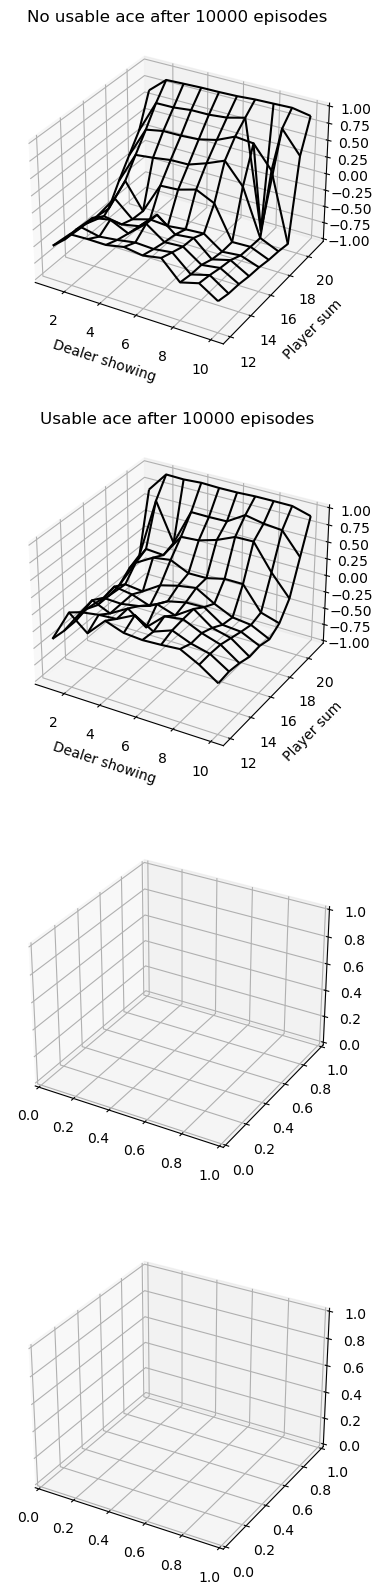

In [78]:
fig, axes = pyplot.subplots(nrows=4, figsize=(15, 20), subplot_kw={'projection': '3d'})
axes[0].set_title('No usable ace after 10000 episodes')
axes[1].set_title('Usable ace after 10000 episodes')
plot_backjack_b(Q,pi,axes[0],axes[1])

# Q3: Four Rooms, re-visited

In [90]:
"""DO NOT CHANGE"""
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}

        # define the start state
        self.start_state = [0, 0]

        # define the goal state
        self.goal_state = [10, 10]

        # maximal time steps
        self.max_time_steps = 459

        # track the time step
        self.t = 0

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        # reset the agent state to be [0, 0]
        state = self.start_state
        # reset the reward to be 0
        reward = 0
        # reset the termination flag
        done = False
        # reset the time step tracker
        self.t = 0
        return state, reward, done

    def step(self, state, act):
        """
        Args:
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        # Increase the time step
        self.t += 1

        # With probability 0.8, the agent takes the correct direction.
        # With probability 0.2, the agent takes one of the two perpendicular actions.
        # For example, if the correct action is "LEFT", then
        #     - With probability 0.8, the agent takes action "LEFT";
        #     - With probability 0.1, the agent takes action "UP";
        #     - With probability 0.1, the agent takes action "DOWN".
        if np.random.uniform() < 0.2:
            if act == "LEFT" or act == "RIGHT":
                act = np.random.choice(["UP", "DOWN"], 1)[0]
            else:
                act = np.random.choice(["RIGHT", "LEFT"], 1)[0]

        # Compute the next state
        #for debug
#         print("act is = ", act)
        next_state = self.take_action(state, act)

        # Compute the reward
        reward = 1.0 if next_state == [10, 10] else 0.0

        # Check the termination
        # If the agent reaches the goal, reward = 1, done = True
        # If the time steps reaches the maximal number, reward = 0, done = True.
        if next_state == [10, 10] or self.t == self.max_time_steps:
            done = True
        else:
            done = False

        return next_state, reward, done

    def take_action(self, state, act):
        """
        Input args:
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

### (a): Implement first-visit Monte-Carlo control with a epsilon-greedy policy

In [403]:
# for test
env4room = FourRooms()
state, reward, done = env4room.reset()
print(env4room.action_space)

{'LEFT': array([-1,  0]), 'RIGHT': array([1, 0]), 'DOWN': array([ 0, -1]), 'UP': array([0, 1])}


In [194]:
""" CODE HERE YOUR IMPLEMENTATION for Q3-(a) """
# Implementation of the one-policy first-vist Monte-Carlo control (for ε-soft policies) here.
# To debug your code, you can use run_num = 5 and episode_num = 1e3
# To report the finial results, please use run_num = 10 and episode_num = 1e4

def episodeGenerator4Room(env,policy):
    state = []
    action = []
    reward = []
    
    current_state, reward_, done = env.reset()
    
    while True:
        #S0
        state.append(current_state)
        #A0
        action_ = policy[current_state[0],current_state[1]]

        action.append(action_)       
        #next state
        current_state, reward_, done = env.step(current_state, action_)
        #R1 
        reward.append(reward_) 
        
        if done:
            break
    return state, action, reward


In [421]:
def episodeGenerator4Room(env, policy):
    """ Follow policy through an episode and return arrays of visited actions, states and returns """
    choices_index = ['LEFT','RIGHT','DOWN','UP']
    state_list = []
    action_list = []
    rewards = []

    done = False
    current_state, reward_, done = env.reset()

    while not done:
        state_ = env.state_space.index(current_state)
        state_list += [state_]
        # print(state_)

        # Sample action from the policy
        action = np.random.choice(choices_index, p=policy[state_])
        # print("state_ = ",state_)
        # print("policy[state_] = ",policy[state_])
        

        action_ = choices_index.index(action)
        # print(action_)
        # action = env.action_space[action_]
        action_list += [action_]

        # Step the environment forward and take the sampled action
        
        current_state, reward, done = env.step(current_state,action)
        rewards += [reward]
        # print("rewards = ",rewards)
        # print("state = ",current_state,"action = ",action,"reward = ",reward)


    # Returns without discounting
    
#     print(returns)

#     assert len(state_ridxs) == len(action_ridxs) == len(returns)
    return state_list, action_list, rewards

In [422]:
def On_policy_first_visit_MC_control_4Room(env, num_episodes, eps):
#     n_action_ridx = np.array(env.action_space).shape[0]
    n_action_ridx = 4
    n_state_ridx = np.array(env.state_space).shape[0] 
    q = np.ones([n_state_ridx, n_action_ridx])
    policy = np.ones([n_state_ridx, n_action_ridx]) / n_action_ridx
    
    G_list = []
    N = np.zeros([n_state_ridx, n_action_ridx])
    average_reward = 0
    sample_rate = 0
    buff = 0
    for episode in range(num_episodes):
        # Sample an episode and collect first-visit states, actions & returns
        state_ridxs, action_ridxs, reward_ridxs = episodeGenerator4Room(env, policy)
        # Update the state-action values with first-visit returns
        G = 0
        sample_rate = sample_rate + 1
        for t in range(len(state_ridxs) - 1, -1, -1):
            S = state_ridxs[t]
            G = 0.99*G + reward_ridxs[t]

            if S not in state_ridxs[:t]:
#                 Returns[state_ridxs[t], action_ridxs[t]] = G
                N[state_ridxs[t], action_ridxs[t]] = N[state_ridxs[t], action_ridxs[t]] + 1
#                 print("state_ridxs[t]",state_ridxs[t])
#                 print("action_ridxs[t]",action_ridxs[t])
                q[state_ridxs[t], action_ridxs[t]] += (1/N[state_ridxs[t], action_ridxs[t]])*(G - q[state_ridxs[t], action_ridxs[t]])
                # print('q[',state_ridxs[t],',', action_ridxs[t],'] = ',q[state_ridxs[t], action_ridxs[t]])
                argmaxList = q[state_ridxs[t], :]
                # print('argmaxList = ',argmaxList)
                act_index = np.random.choice(np.where(argmaxList == argmaxList.max())[0])
                greedy_action_ridxs = act_index
#                 greedy_action_ridxs = np.argmax(q[state_ridxs[t], :])
                # print(greedy_action_ridxs)
                policy[state_ridxs[t], :] = eps / n_action_ridx
                policy[state_ridxs[t], greedy_action_ridxs] = 1 - eps + eps / n_action_ridx
#                 print("policy",state_ridxs[t] ,"= ",policy[state_ridxs[t], :])


        
        G_list.append(G)
        # print(policy)
#         print("G = ",G)
        if episode % 1000 == 0:
#             print(f"Episode {episode}/{num_episodes}: #updates={len(state_ridxs)} return={min(returns)}")
            print(f"Episode {episode}/{num_episodes}: #updates={len(state_ridxs)} return={G}")
    return q, policy, G_list

In [173]:
trial_num = 5
trial_length = 10000
rewards_list01 = []
rewards_list001 = []
rewards_list0 = []
env4room = FourRooms()


In [ ]:
for i in range(trial_num):
    Q01, pi01, reward01 = On_policy_first_visit_MC_control_4Room(env4room,trial_length,0.1)
    rewards_list01.append(reward01)

for i in range(trial_num):
    Q0, pi0, reward0 = On_policy_first_visit_MC_control_4Room(env4room,trial_length,0)
    rewards_list0.append(reward0)

for i in range(trial_num):
    Q001, pi001, reward001 = On_policy_first_visit_MC_control_4Room(env4room,trial_length,0.01)
    rewards_list001.append(reward001)

In [829]:
# rewards = np.array([reward01])
# up_bound1 = max(reward01)
plot_curves(np.array([rewards_list01,rewards_list001,rewards_list0]),
            np.array(["epsilon = 0.1 ", "epsilon = 0.01", "epsilon = 0"]),
            ["green","red","blue"],
            "Average reward")
# plot_curves(np.array([rewards_list01]),
#             np.array(["epsilon = 0.1 "]),
#             ["green"],
#             "Average reward")

In [88]:
# print(pi1)

## Q5: Racktrack

Please note, we provde you with the implementation of the two Racetrack domains in the Figure 5.5.

In [674]:
# Define the Racetrack domain 1
racetrack_v1_arr = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]])

racetrack_v2_arr = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

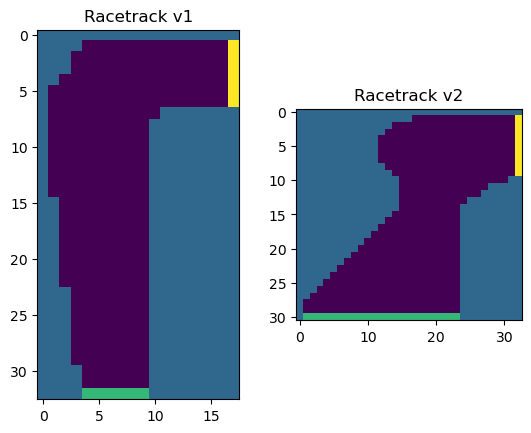

In [675]:
fig, arr = plt.subplots(1, 2)
arr[0].set_title("Racetrack v1")
arr[0].imshow(racetrack_v1_arr)
arr[1].set_title("Racetrack v2")
arr[1].imshow(racetrack_v2_arr)
plt.show()

In [799]:
"""Implementation of the Racetrack environment. Do not change"""
class Racetrack(object):
    def __init__(self, version):
        # Load the pre-defined the domain having the following representation
        #   - 1: track cell
        #   - 0: empty cell
        #   - 2: empty cell on the start line
        #   - 3: empty cell on the finish line
        if version == "v1":
            self.domain_arr = racetrack_v1_arr.copy()
        else:
            self.domain_arr = racetrack_v2_arr.copy()

        # domain size
        self.height, self.width = self.domain_arr.shape

        # State space consists of:
        # Agent location
        self.empty_cell_locs = self.render_cell_locations(val=0.0)
        self.track_cell_locs = self.render_cell_locations(val=1.0)
        self.start_cell_locs = self.render_cell_locations(val=2.0)
        self.finish_cell_locs = self.render_cell_locations(val=3.0)

        # Action space
        self.action_space = [[-1, -1], [-1, 0], [-1, 1],
                             [0, -1], [0, 0], [0, 1],
                             [1, -1], [1, 0], [1, 1]]

        # construct the state space
        self.state_space = []
        for loc in self.start_cell_locs + self.empty_cell_locs + self.finish_cell_locs:
            for i in range(5):
                for j in range(5):
                    self.state_space.append(loc + [i, j])

        # track the agent's location
        self.state = None
        self.action = None
        self.t = None

    def reset(self):
        # randomly select one cell from the start line
        start_loc = random.sample(self.start_cell_locs, 1)[0]
        # reset the velocity to be zero for both x and y directions
        start_vel = [0, 0]
        # the state is a combination of location and velocity
        # for example: [loc_x, loc_y, vel_x, vel_y]
        state = start_loc + start_vel
        # reward
        reward = None
        # done
        done = False
        # track agent's location
        self.state = tuple(state)
        self.t = 0
        return state, reward, done

    def step(self, state, action):
        """
        Args:
            state (list): a list variable consists of agent's location + agent's current velocity. e.g., [x, y, v_x, v_y]
            action (list): a list variable consists of agent's velocity increments. e.g., [increments_v_x, increments_v_y]
        """
        # reward is -1 for every time step until the agent passes the finish line
        reward = -1
        self.t += 1
        
        # with the probability = 0.1, set action = [0, 0]
        if np.random.random() < 0.1:
            action = [0, 0]

        # update the velocity components
        # note that, both velocity is discrete and constraint within [0, 4]
        next_vel_x = np.clip(state[2] + action[0], a_min=0, a_max=4)
        next_vel_y = np.clip(state[3] + action[1], a_min=0, a_max=4)
        next_state_vel = [next_vel_x, next_vel_y]

        # only the cells on the start line can have both 0 velocities
        if next_state_vel == [0, 0]:
            if state not in self.start_cell_locs:
                # non-zero for velocities
                if state[2] == 0 and state[3] != 0:
                    next_state_vel = [0, 1]
                if state[2] != 0 and state[3] == 0:
                    next_state_vel = [1, 0]
                if state[2] != 0 and state[3] != 0:
                    non_zero_idx = random.sample([0, 1], 1)[0]
                    next_state_vel[non_zero_idx] = 1

        # update the next state location based on the updated velocities
        next_state_loc = [np.clip(state[0] + next_state_vel[0], a_min=0, a_max=self.width-1),
                          np.clip(state[1] + next_state_vel[1], a_min=0, a_max=self.height-1)]

        # check whether the agent hits the track
        if next_state_loc in self.track_cell_locs:
            # move back to the start line
            next_state_loc = random.sample(self.start_cell_locs, 1)[0]
            # reduce velocity to be 0s
            next_state_vel = [0, 0]
            # episode continue
            done = False
            # episode down
            # done = True
            # next state
            next_state = next_state_loc + next_state_vel
            return next_state, reward, done

        # check whether the agent pass the finish line
        if next_state_loc in self.finish_cell_locs:
            next_state = next_state_loc + next_state_vel
            done = True
            return next_state, 0, done

        # otherwise combine the next state
        next_state = next_state_loc + next_state_vel
        # termination
        done = False

        # track the agent's state
        self.state = tuple(next_state)
        self.action = action
        return next_state, reward, done

    def render_cell_locations(self, val):
        row_loc_indices, col_loc_indices = np.where(self.domain_arr == val)
        cell_locations = [[c, (self.height-1) - r] for r, c in zip(row_loc_indices, col_loc_indices)]
        return cell_locations

    def render(self):
        plt.clf()
        plt.title(f"s = {self.state}, a = {self.action}")
        plot_arr = self.domain_arr.copy()
        plot_arr[(self.height - 1) - self.state[1], self.state[0]] = 4
        plt.imshow(plot_arr)
        plt.show(block=False)
        plt.pause(0.01)

## (a): Implement first-visit Monte-Carlo control with a epsilon-greedy policy (epsilon = 0.1)
    - Plot the learning curves for the two tracks.
    - Use running trials number = 10 and episodes number = 1e4

7450


In [800]:
def episodeGeneratorRacingTrack(env, policy):
    """ Follow policy through an episode and return arrays of visited actions, states and returns """
    choices_index = np.arange(int(np.prod(np.array(env.action_space).shape[0])))
    state_list = []
    action_list = []
    rewards = []

    done = False
    current_state, reward_, done = env.reset()
    step = 0
    while not done:
        state_ = env.state_space.index(current_state)
        state_list += [state_]
#         print('current state index = ', state_)

        # Sample action from the policy
        action_ = np.random.choice(choices_index, p = policy[state_])
#         print('current policy = ', policy[state_])
        action = env.action_space[action_]
        action_list += [action_]

        # Step the environment forward and take the sampled action
        current_state, reward, done = env.step(current_state,action)
        rewards += [reward]


        step += 1
        if step > 500:
            done = True



    return state_list, action_list, rewards

In [806]:
def On_policy_first_visit_MC_control_raceTrack(env, num_episodes, eps):
    n_action_ridx = np.array(env.action_space).shape[0]
    n_state_ridx = np.array(env.state_space).shape[0]
    q = np.ones([n_state_ridx, n_action_ridx])
    policy = np.ones([n_state_ridx, n_action_ridx]) / n_action_ridx
    G_list = []
    N = np.zeros([n_state_ridx, n_action_ridx])
    Returns = np.zeros([n_state_ridx, n_action_ridx])
    
    for episode in range(num_episodes):
        # Sample an episode and collect first-visit states, actions & returns
        state_ridxs, action_ridxs, reward_ridxs = episodeGeneratorRacingTrack(env, policy)
        # Update the state-action values with first-visit returns
        G = 0
        for t in range(len(state_ridxs) - 1, -1, -1):
            S = state_ridxs[t]
            G = G + reward_ridxs[t]
            
            
            if S not in state_ridxs[:t]:
#                 Returns[state_ridxs[t], action_ridxs[t]] = G
                N[state_ridxs[t], action_ridxs[t]] = N[state_ridxs[t], action_ridxs[t]] + 1
#                 print("state_ridxs[t]",state_ridxs[t])
#                 print("action_ridxs[t]",action_ridxs[t])
                q[state_ridxs[t], action_ridxs[t]] += (1/N[state_ridxs[t], action_ridxs[t]])*(G - q[state_ridxs[t], action_ridxs[t]])
#                 print('q[',state_ridxs[t],',', action_ridxs[t],'] = ',q[state_ridxs[t], action_ridxs[t]])
                argmaxList = q[state_ridxs[t], :]
#                 print('argmaxList = ',argmaxList)
                act_index = np.random.choice(np.where(argmaxList == argmaxList.max())[0])
                greedy_action_ridxs = act_index
#                 greedy_action_ridxs = np.argmax(q[state_ridxs[t], :])
#                 print(greedy_action_ridxs)
                policy[state_ridxs[t], :] = eps / n_action_ridx
                policy[state_ridxs[t], greedy_action_ridxs] = 1 - eps + eps / n_action_ridx
#                 print("policy",state_ridxs[t] ,"= ",policy[state_ridxs[t], :])

        G_list.append(G)
#         print("G = ",G)
        if episode % 100 == 0:
#             print(f"Episode {episode}/{num_episodes}: #updates={len(state_ridxs)} return={min(returns)}")
            print(f"Episode {episode}/{num_episodes}: #updates={len(state_ridxs)} return={G}")
    return q, policy, G_list

In [802]:
env = Racetrack(version = 'v1')
q, policy, G = On_policy_first_visit_MC_control_raceTrack(env, 10, eps=0.1)

Episode 0/10: #updates=501 return=-501


In [787]:
print(q[6527,7])

-469.0


In [815]:
env1 = Racetrack(version = 'v1')
env2 = Racetrack(version = 'v2')
trial_num = 10
trial_length = 2000
rewards_listRaceTrack1 = []
rewards_listRaceTrack2 = []
for i in range(trial_num):
    rewards_list = []
    q, policy, G = On_policy_first_visit_MC_control_raceTrack(env1, trial_length, eps=0.1)
    rewards_listRaceTrack1.append(G)
    
for i in range(trial_num):
    rewards_list = []
    q, policy, G = On_policy_first_visit_MC_control_raceTrack(env2, trial_length, eps=0.1)
    rewards_listRaceTrack2.append(G)

Episode 0/2000: #updates=501 return=-501
Episode 100/2000: #updates=501 return=-501
Episode 200/2000: #updates=501 return=-501
Episode 300/2000: #updates=439 return=-438
Episode 400/2000: #updates=501 return=-501
Episode 500/2000: #updates=21 return=-20
Episode 600/2000: #updates=96 return=-95
Episode 700/2000: #updates=51 return=-50
Episode 800/2000: #updates=63 return=-62
Episode 900/2000: #updates=16 return=-15
Episode 1000/2000: #updates=88 return=-87
Episode 1100/2000: #updates=44 return=-43
Episode 1200/2000: #updates=30 return=-29
Episode 1300/2000: #updates=66 return=-65
Episode 1400/2000: #updates=54 return=-53
Episode 1500/2000: #updates=34 return=-33
Episode 1600/2000: #updates=59 return=-58
Episode 1700/2000: #updates=211 return=-210
Episode 1800/2000: #updates=26 return=-25
Episode 1900/2000: #updates=157 return=-156
Episode 0/2000: #updates=501 return=-501
Episode 100/2000: #updates=501 return=-501
Episode 200/2000: #updates=501 return=-501
Episode 300/2000: #updates=501 

Episode 1500/2000: #updates=63 return=-62
Episode 1600/2000: #updates=27 return=-26
Episode 1700/2000: #updates=62 return=-61
Episode 1800/2000: #updates=39 return=-38
Episode 1900/2000: #updates=291 return=-290
Episode 0/2000: #updates=134 return=-133
Episode 100/2000: #updates=501 return=-501
Episode 200/2000: #updates=251 return=-250
Episode 300/2000: #updates=475 return=-474
Episode 400/2000: #updates=98 return=-97
Episode 500/2000: #updates=75 return=-74
Episode 600/2000: #updates=63 return=-62
Episode 700/2000: #updates=214 return=-213
Episode 800/2000: #updates=187 return=-186
Episode 900/2000: #updates=101 return=-100
Episode 1000/2000: #updates=60 return=-59
Episode 1100/2000: #updates=83 return=-82
Episode 1200/2000: #updates=43 return=-42
Episode 1300/2000: #updates=30 return=-29
Episode 1400/2000: #updates=39 return=-38
Episode 1500/2000: #updates=74 return=-73
Episode 1600/2000: #updates=10 return=-9
Episode 1700/2000: #updates=50 return=-49
Episode 1800/2000: #updates=42 

Episode 1000/2000: #updates=117 return=-116
Episode 1100/2000: #updates=19 return=-18
Episode 1200/2000: #updates=18 return=-17
Episode 1300/2000: #updates=95 return=-94
Episode 1400/2000: #updates=61 return=-60
Episode 1500/2000: #updates=27 return=-26
Episode 1600/2000: #updates=37 return=-36
Episode 1700/2000: #updates=17 return=-16
Episode 1800/2000: #updates=62 return=-61
Episode 1900/2000: #updates=33 return=-32


<Figure size 640x480 with 0 Axes>

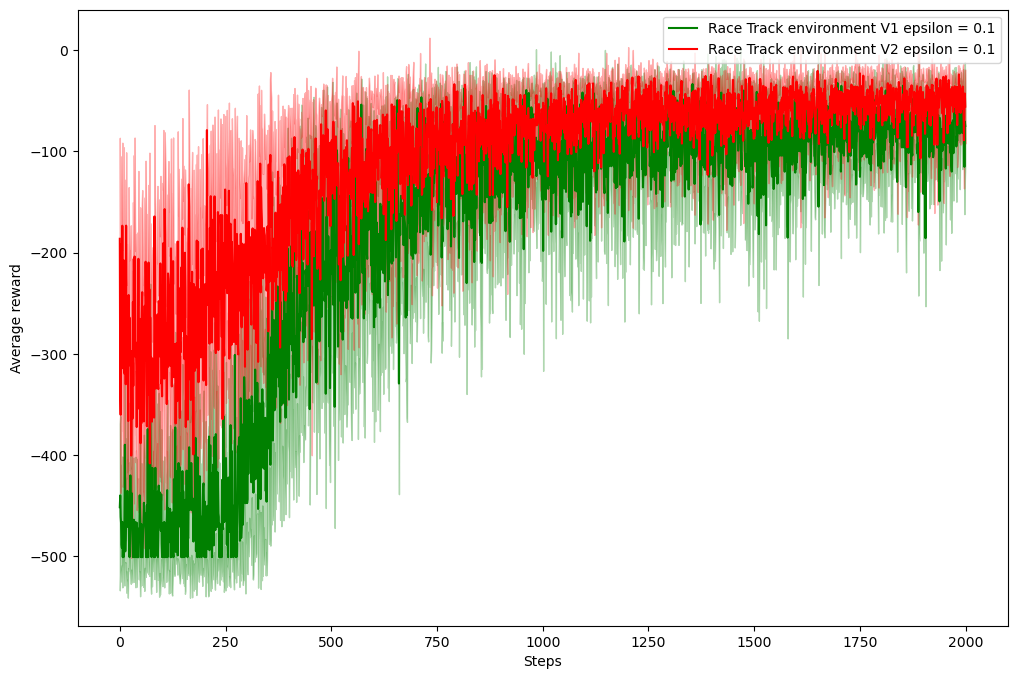

In [816]:
# print(np.array([rewards_listRaceTrack])[0].shape)
# print(rewards_listRaceTrack[])
# print(mean(rewards_listRaceTrack[:][-1]))
plot_curves(np.array([rewards_listRaceTrack1,rewards_listRaceTrack2]),
            np.array(["Race Track environment V1 epsilon = 0.1","Race Track environment V2 epsilon = 0.1"]),
            ["green","red"],
            "Average reward")

(1, 10, 2000)


In [819]:
""" CODE HERE YOUR IMPLEMENTATION for Q5-(b) """
# Implement here and use the plotting function above to plot the learning curve 
def Off_policy_first_visit_MC_control_raceTrack(env, num_episodes,eps = 0.01):
    n_action_ridx = np.array(env.action_space).shape[0]
    n_state_ridx = np.array(env.state_space).shape[0]
    q = np.ones([n_state_ridx, n_action_ridx])
    c = np.zeros([n_state_ridx, n_action_ridx])
    policy = np.ones([n_state_ridx, n_action_ridx]) / n_action_ridx
    b = np.ones([n_state_ridx, n_action_ridx]) / n_action_ridx
    G_list = []
    N = np.zeros([n_state_ridx, n_action_ridx])
    Returns = np.zeros([n_state_ridx, n_action_ridx])
    
    for episode in range(num_episodes):
        # Sample an episode and collect first-visit states, actions & returns
        state_ridxs, action_ridxs, reward_ridxs = episodeGeneratorRacingTrack(env, b)
        # Update the state-action values with first-visit returns
        G = 0
        W = 1
        
        for t in range(len(state_ridxs) - 1, -1, -1):
            S = state_ridxs[t]
            G = G + reward_ridxs[t]
            c[state_ridxs[t], action_ridxs[t]] = c[state_ridxs[t], action_ridxs[t]] + W
            
            
#                 Returns[state_ridxs[t], action_ridxs[t]] = G
            N[state_ridxs[t], action_ridxs[t]] = N[state_ridxs[t], action_ridxs[t]] + 1

            #                 print("state_ridxs[t]",state_ridxs[t])
            #                 print("action_ridxs[t]",action_ridxs[t])
            q[state_ridxs[t], action_ridxs[t]] += (W/c[state_ridxs[t], action_ridxs[t]])*(G - q[state_ridxs[t], action_ridxs[t]])
            #                 print('q[',state_ridxs[t],',', action_ridxs[t],'] = ',q[state_ridxs[t], action_ridxs[t]])
            argmaxList = q[state_ridxs[t], :]
            #                 print('argmaxList = ',argmaxList)
            act_index = np.random.choice(np.where(argmaxList == argmaxList.max())[0])
            greedy_action_ridxs = act_index
            #                 greedy_action_ridxs = np.argmax(q[state_ridxs[t], :])
            #                 print(greedy_action_ridxs)
            policy[state_ridxs[t], :] = 0
            policy[state_ridxs[t], greedy_action_ridxs] = 1
            #                 print("policy",state_ridxs[t] ,"= ",policy[state_ridxs[t], :])
            argmaxList = q[state_ridxs[t], :]
#                 print('argmaxList = ',argmaxList)


            act_index = np.random.choice(np.where(argmaxList == argmaxList.max())[0])
            greedy_action_ridxs = act_index
#                 greedy_action_ridxs = np.argmax(q[state_ridxs[t], :])
#                 print(greedy_action_ridxs)
            b[state_ridxs[t], :] = eps / n_action_ridx
            b[state_ridxs[t], greedy_action_ridxs] = 1 - eps + eps / n_action_ridx
        
            if not action_ridxs[t] == greedy_action_ridxs:
                break
                
            W = W/b[state_ridxs[t], action_ridxs[t]]


        G_list.append(G)
#         print("G = ",G)
        if episode % 100 == 0:
#             print(f"Episode {episode}/{num_episodes}: #updates={len(state_ridxs)} return={min(returns)}")
            print(f"Episode {episode}/{num_episodes}: #updates={len(state_ridxs)} return={G}")
    
    return q, policy, G_list

In [826]:
env1 = Racetrack(version = 'v1')
env2 = Racetrack(version = 'v2')
trial_num = 10
trial_length = 100
rewards_listRaceTrack1 = []
rewards_listRaceTrack2 = []
for i in range(trial_num):
    rewards_list = []
    q1, policy1, G = On_policy_first_visit_MC_control_raceTrack(env1, trial_length, eps=0.1)
    rewards_listRaceTrack1.append(G)
    
# for i in range(trial_num):
#     rewards_list = []
#     q2, policy2, G = On_policy_first_visit_MC_control_raceTrack(env2, trial_length, eps=0.1)
#     rewards_listRaceTrack2.append(G)

Episode 0/100: #updates=501 return=-501
Episode 0/100: #updates=501 return=-501
Episode 0/100: #updates=501 return=-501
Episode 0/100: #updates=483 return=-482
Episode 0/100: #updates=501 return=-501
Episode 0/100: #updates=501 return=-501
Episode 0/100: #updates=501 return=-501
Episode 0/100: #updates=501 return=-501
Episode 0/100: #updates=501 return=-501
Episode 0/100: #updates=153 return=-152


<Figure size 640x480 with 0 Axes>

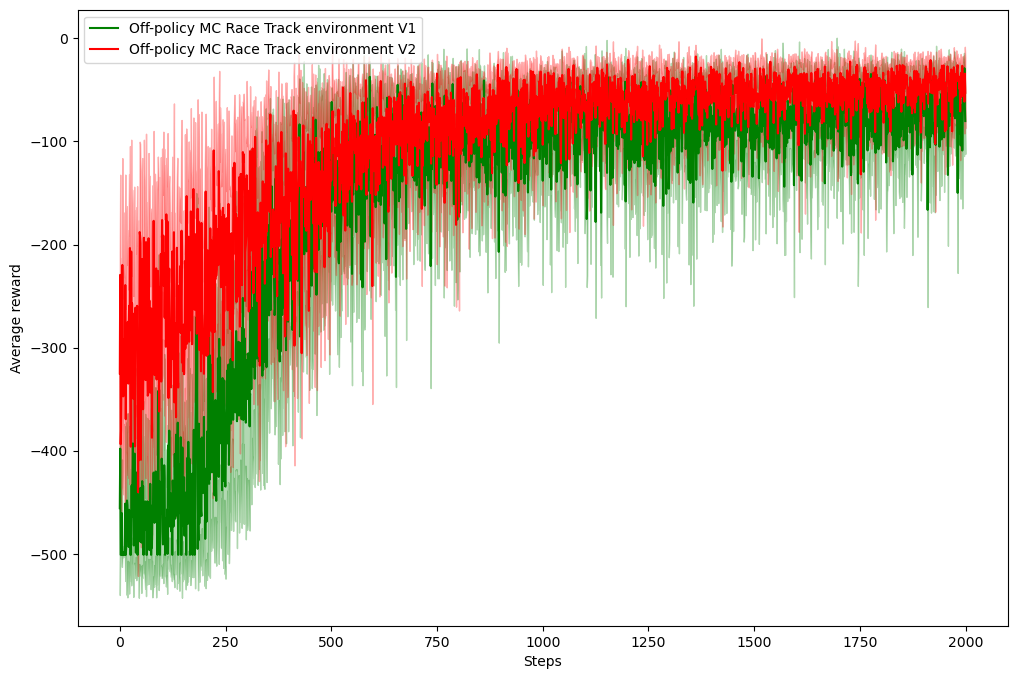

In [822]:
plot_curves(np.array([rewards_listRaceTrack1,rewards_listRaceTrack2]),
            np.array(["Off-policy MC Race Track environment V1","Off-policy MC Race Track environment V2"]),
            ["green","red"],
            "Average reward")

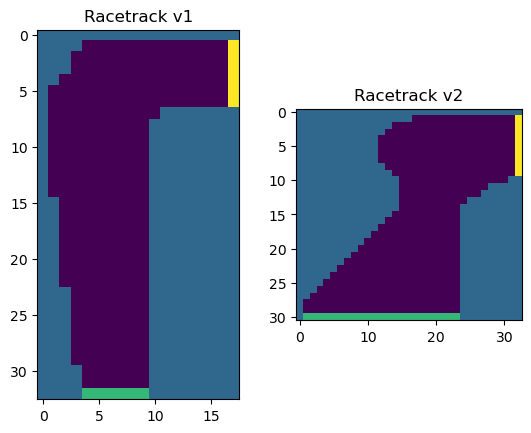

In [823]:

fig, arr = plt.subplots(1, 2)
arr[0].set_title("Racetrack v1")
arr[0].imshow(racetrack_v1_arr)
arr[1].set_title("Racetrack v2")
arr[1].imshow(racetrack_v2_arr)
plt.show()